Савчук Денис ПМиИ-б-о-192

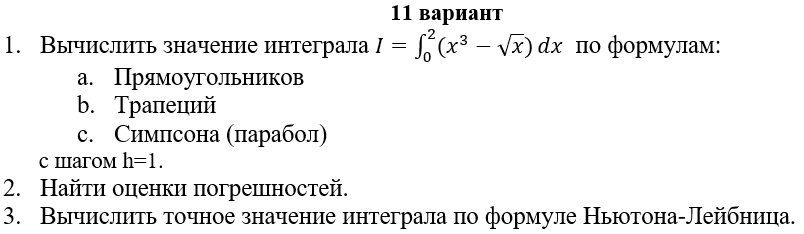

In [103]:
import numpy as np
import sympy

In [104]:
def f(x):
    return x**3 - np.sqrt(x)

In [105]:
def str_rect(a, b, razb):
    h = (b-a)/razb
    ret = 0
    xi = a
    while xi < b :
        ret = ret + h*f(xi + h/2)
        xi = xi + h
    return ret

In [106]:
def trap(a, b, n):
    h = (b - a)/n
    ret = (f(a) + f(b))/2
    xi = a + h
    while xi < b :
        ret = ret + f(xi)
        xi = xi + h
    return h*ret

In [107]:
def simpson(a, b, n):
    h = (b - a) / (2*n)
    ret = f(a) + f(b)
    for i in range(1, n + 1):
        xi = a + (2*i - 1)*h
        ret = ret + 4*f(xi)
        if i != n:
            ret = ret + 2*f(xi + h)
    return (h/3)*ret

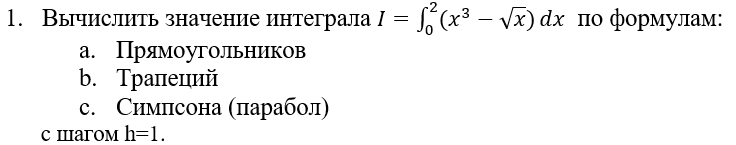

In [108]:
h = 1
n = int((2-0)/h)
print(n)
print('Правильный ответ =', 2.114381916835873)
print('Формула центральных прямоугольников = ', str_rect(0, 2, n))
print('Формула трапеций = ', trap(0, 2, n))
print('Формула Симпсона = ', simpson(0, 2, n))

2
Правильный ответ = 2.114381916835873
Формула центральных прямоугольников =  1.5681483474218636
Формула трапеций =  3.2928932188134525
Формула Симпсона =  2.143063304552393


In [109]:
z = sympy.Symbol('z')
fz = (z**3 - sympy.sqrt(z))
proizv = [fz]
proizv.append(fz.diff(z))
proizv.append(proizv[1].diff(z))
proizv.append(proizv[2].diff(z))
proizv.append(proizv[3].diff(z))

In [110]:
print(proizv)

[-sqrt(z) + z**3, 3*z**2 - 1/(2*sqrt(z)), 6*z + 1/(4*z**(3/2)), 6 - 3/(8*z**(5/2)), 15/(16*z**(7/2))]


Вычисление погрешности для формулы центральных прямоугольников

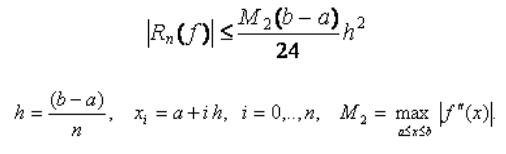

In [111]:
def str_rect_pogr(a, b, h):
    xi = a
    M2 = 0
    while xi <= b :
        if xi!= 0:
            temp = proizv[2].subs(z, xi)
            if np.abs(temp) > np.abs(M2):
                M2 = np.abs(temp)
        xi = xi + h
    return M2

Вычисление погрешности для формулы трапеций

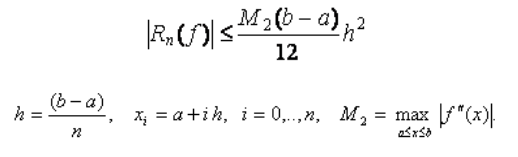

In [112]:
def trap_pogr(a, b, h):
    xi = a
    M2 = 0
    while xi <= b :
        if xi!= 0:
            temp = proizv[2].subs(z, xi)
            if np.abs(temp) > np.abs(M2):
                M2 = np.abs(temp)
        xi = xi + h
    return M2

Вычисление погрешности для формулы Симпсона

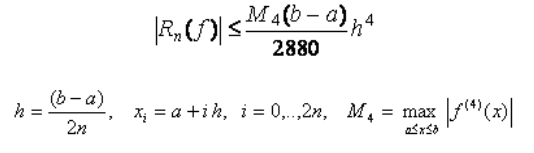

In [113]:
def simpson_pogr(a, b, h):
    xi = a
    M2 = 0
    while xi <= b :
        if xi!= 0:
            temp = proizv[4].subs(z, xi)
            if np.abs(temp) > np.abs(M2):
                M2 = np.abs(temp)
        xi = xi + h
    return M2

In [114]:
result = str_rect_pogr(0, 2, h)
M = sympy.N(result)
print('Погрешность формулы прямоугольников', M*h*h/24)
result = trap_pogr(0, 2, h)
M = sympy.N(result)
print('Погрешность формулы трапеций', M*h*h/12)
result = simpson_pogr(0, 2, h)
M = sympy.N(result)
print('Погрешность формулы Симпсона', M*h*h*h*h/2880)

Погрешность формулы прямоугольников 0.503682847818680
Погрешность формулы трапеций 1.00736569563736
Погрешность формулы Симпсона 0.000325520833333333




Формула Ньютона-Лейбница:

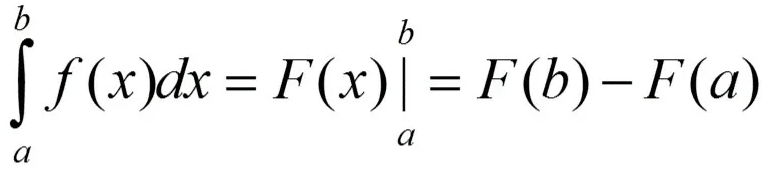

In [115]:
pervoobraz = sympy.integrate(fz, z)
print(pervoobraz)

-2*z**(3/2)/3 + z**4/4


In [116]:
tochn_znach_b = pervoobraz.subs(z, 2)
tochn_znach_a = pervoobraz.subs(z, 0)
tochn_znach = tochn_znach_b - tochn_znach_a
print('Значение интеграла вычисленное по формуле Ньютона-Лейбница', sympy.N(tochn_znach))

Значение интеграла вычисленное по формуле Ньютона-Лейбница 2.11438191683587
